In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA exploring 

In [313]:
df= pd.read_csv('stroke_data.csv')

In [314]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29065.0,47.676174,18.732941,10.00,32.00,48.00,62.00,82.00
hypertension,29065.0,0.111509,0.314766,0.00,0.00,0.00,0.00,1.00
heart_disease,29065.0,0.052159,0.222351,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,29065.0,106.405639,45.272453,55.01,77.63,92.13,113.91,291.05
bmi,29065.0,30.054684,7.193951,10.10,25.00,28.90,33.90,92.00
stroke,29065.0,0.018854,0.136013,0.00,0.00,0.00,0.00,1.00


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


In [317]:
df.isnull().any() # good, we don't have missing data

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [318]:
# let's first see if the target column is balanced or not

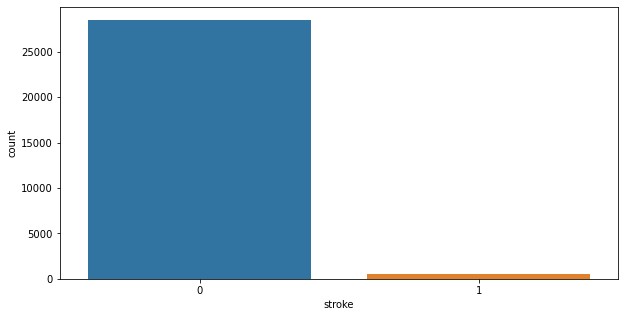

In [319]:
plt.figure(figsize=(10,5))
sns.countplot(x='stroke', data=df); # we can see our target column is very unbalanced

In [320]:
df.select_dtypes(exclude=np.number).columns #let's get the non-numeric columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [321]:
stroke = df[df['stroke']==1] # since this is a very imbalanced data, let's just look at the people with cancer

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


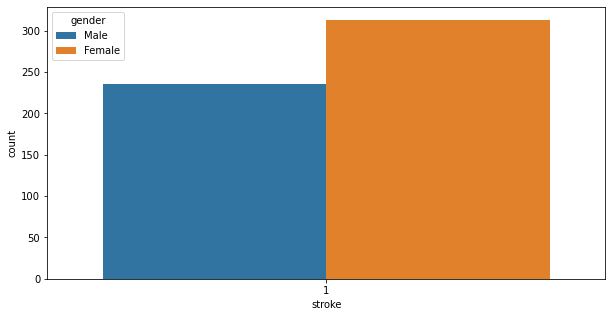

In [322]:
plt.figure(figsize=(10,5))
sns.countplot('stroke', hue='gender', data=stroke); # seems like more females get stroke than males

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


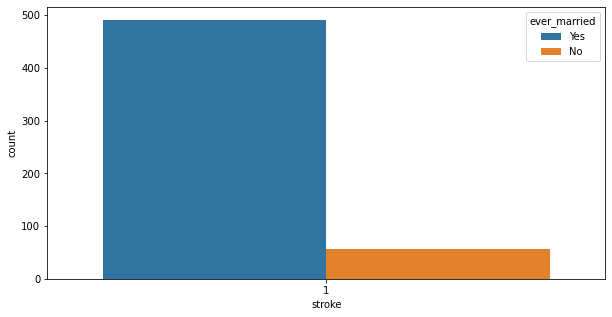

In [323]:
plt.figure(figsize=(10,5))
sns.countplot('stroke', hue='ever_married', data=stroke); ## married people tend to have stroke, ohhh no!!!!

In [324]:
len(df)

29065

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


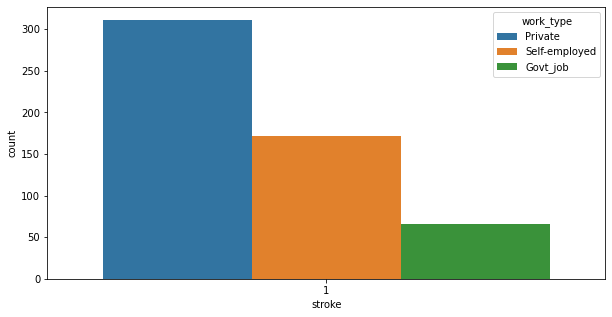

In [325]:
plt.figure(figsize=(10,5))
sns.countplot('stroke', hue='work_type', data=stroke); 

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


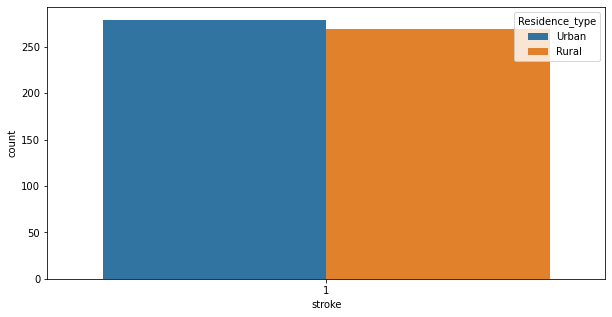

In [326]:
plt.figure(figsize=(10,5))
sns.countplot('stroke', hue='Residence_type', data=stroke); # there is no too much difference in terms of residence_type

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


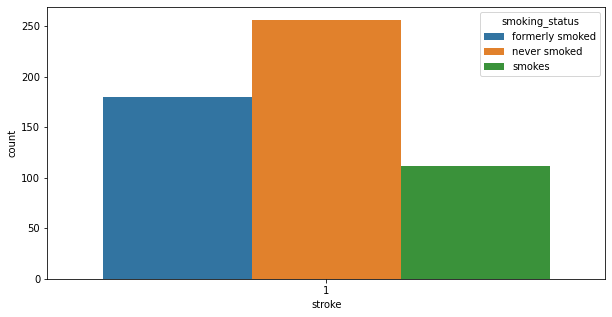

In [327]:
plt.figure(figsize=(10,5))
sns.countplot('stroke', hue='smoking_status', data=stroke); # ok this is suprising

In [328]:
# now, let's see the correlation with the numeric columns

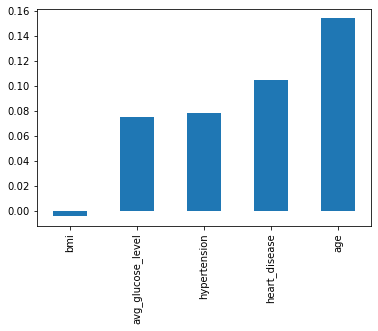

In [329]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar'); # bmi is not really correlated with stroke, we can go ahead and drop it

In [330]:
df = df.drop('bmi', axis=1).copy()

# Feature engineering 

In [331]:
scaler = {'Male':1, 'Female':0}

In [332]:
df['gender']=df['gender'].replace(scaler)

In [333]:
scaler2 = {'Yes':1, 'No':0}

In [334]:
df['ever_married'] = df['ever_married'].replace(scaler2)

In [335]:
scaler3 = {'Urban':1, 'Rural':0}

In [336]:
df['Residence_type'] = df['Residence_type'].replace(scaler3)

In [337]:
df.head() # let's check the data again, now we only have two categorical columns that are not numeric, let's use get_dummies

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,58.0,1,0,1,Private,1,87.96,never smoked,0
1,0,70.0,0,0,1,Private,0,69.04,formerly smoked,0
2,0,52.0,0,0,1,Private,1,77.59,formerly smoked,0
3,0,75.0,0,1,1,Self-employed,0,243.53,never smoked,0
4,0,32.0,0,0,1,Private,0,77.67,smokes,0


In [338]:
df = pd.get_dummies(df) # now  we are ready to build our model

# Build and train a model 

In [409]:
X=df.drop('stroke', axis=1).values
y=df['stroke'].values

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [411]:
stroke = np.where(df['stroke']==1)[0]
no_stroke = np.where(df['stroke']==0)[0]

In [412]:
len(stroke)

548

In [413]:
len(no_stroke)

28517

In [414]:
forest = RandomForestClassifier(class_weight={0:52, 1:1})

In [415]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y, test_size=0.3, random_state=42)

In [416]:
forest.fit(Xtrain, ytrain)

RandomForestClassifier(class_weight={0: 52, 1: 1})

# Evaluation of the model

In [417]:
from sklearn.metrics import confusion_matrix, classification_report

In [418]:
predict = forest.predict(Xtest)

In [419]:
confusion_matrix(ytest, predict)

array([[8538,   18],
       [ 161,    3]])

In [420]:
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8556
           1       0.14      0.02      0.03       164

    accuracy                           0.98      8720
   macro avg       0.56      0.51      0.51      8720
weighted avg       0.97      0.98      0.97      8720



In [ ]:
# this model does bad in predicting the unbalanced dataset, we can see from the precision, recall score for 1 class
# For class 0, this model does a great job. 